# Apply k-NN and SVM for digit recognition

Before applying Deep Learning, first apply the k-NN and SVM algorithms as baseline models.

In [22]:
import os
from mnist import MNIST
import numpy as np
import pandas as pd
from sklearn import svm
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
mnidata = MNIST(os.getcwd()+'/Data')
train_images, train_labels = mnidata.load_training()
test_images, test_labels = mnidata.load_testing()
print('Training set size: '+ str(len(train_labels)))
print('Testing set size:' + str(len(test_labels)))

Training set size: 60000
Testing set size:10000


In [24]:
# dataset is too large for personal computer. Reduce dataset by using pandas sample function
train_images_sample = pd.DataFrame(train_images).sample(n=10000,random_state = 1)
train_labels_sample = pd.Series(train_labels).iloc[train_images_sample.index]
test_images_sample = pd.DataFrame(test_images).sample(n=1000,random_state = 1)
test_labels_sample = pd.Series(test_labels).iloc[test_images_sample.index]

data size: 10000


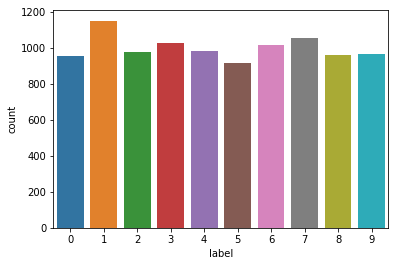

In [25]:
train_labels = pd.Series(train_labels_sample).to_frame(name='label').groupby('label').size().reset_index(name = 'count')
print('data size: ' + str(len(train_images_sample)))
_ = sns.barplot(x= 'label', y = 'count', data = train_labels)

data size: 1000


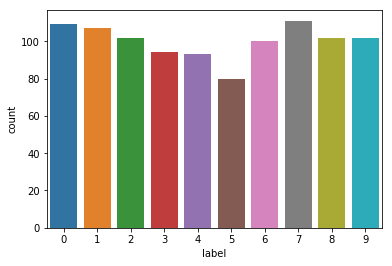

In [26]:
test_labels = pd.Series(test_labels_sample).to_frame(name='label').groupby('label').size().reset_index(name = 'count')
print('data size: ' + str(len(test_labels_sample)))
_ = sns.barplot(x= 'label', y = 'count', data = test_labels)

In [27]:
train_images_sample = train_images_sample.values.tolist()
train_labels_sample = train_labels_sample.values.tolist()
test_images_sample = test_images_sample.values.tolist()
test_labels_sample = test_labels_sample.values.tolist()

kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
scores = []
for n in range(1, 16):
    kNN_model = KNeighborsClassifier(n)
    kNN_model.fit(train_images_sample, train_labels_sample)
    score = kNN_model.score(test_images_sample, test_labels_sample)
    print (str(n) + ' nearest neighbors score is :' + str(score))
    scores.append([n,score])
    

1 nearest neighbors score is :0.947
2 nearest neighbors score is :0.937
3 nearest neighbors score is :0.946
4 nearest neighbors score is :0.943
5 nearest neighbors score is :0.95
6 nearest neighbors score is :0.947
7 nearest neighbors score is :0.948
8 nearest neighbors score is :0.945
9 nearest neighbors score is :0.947
10 nearest neighbors score is :0.947
11 nearest neighbors score is :0.947
12 nearest neighbors score is :0.947
13 nearest neighbors score is :0.946
14 nearest neighbors score is :0.941
15 nearest neighbors score is :0.94


In [30]:
(best_n, best_score) = sorted(scores,key = lambda x: x[1])[-1]
print('Optimized n: ' + str(best_n))
print('Highest score: ' + str(best_score))

Optimized n: 5
Highest score: 0.95


In [31]:
kNN_model = KNeighborsClassifier(best_n).fit(train_images_sample, train_labels_sample)

In [32]:
Prediction = kNN_model.predict(test_images_sample)

In [33]:
def squareFormat(x):
    square = np.array(x)
    square.resize(28,28)
    return square
    
def showImg(x,label):
    plt.imshow(x, cmap = 'gray')
    plt.title('Predicted digit: '+ str(label))
    plt.xticks([])
    plt.yticks([])

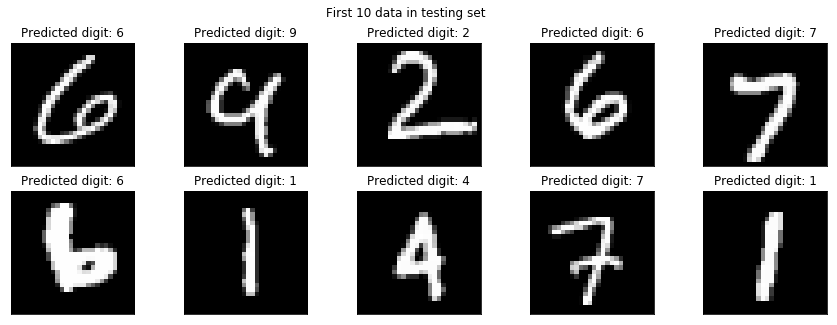

In [34]:
fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 data in testing set')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(test_images_sample[i-1]), Prediction[i-1])

knn results

svm

In [35]:
from sklearn import svm

In [36]:
svm_model = svm.SVC(gamma=0.001)

In [37]:
svm_model.fit(train_images_sample, train_labels_sample)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
svm_model.score(train_images_sample, train_labels_sample)

1.0

In [39]:
svm_model.score(test_images_sample, test_labels_sample)

0.107

In [40]:
Prediction = svm_model.predict(test_images_sample)

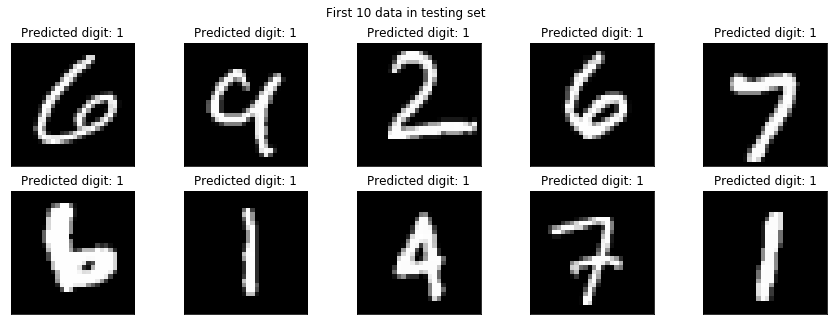

In [41]:
fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 data in testing set')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(test_images_sample[i-1]), Prediction[i-1])

In [57]:
svm_train_sampe = train_images_sample.copy()
svm_train_sampe = np.array(svm_train_sampe)
svm_train_sampe[svm_train_sampe>0] = 1
svm_test_sampe = test_images_sample.copy()
svm_test_sampe = np.array(svm_test_sampe)
svm_test_sampe[svm_test_sampe>0] = 1

In [52]:
svm_model.fit(svm_train_sampe, train_labels_sample)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
svm_model.score(svm_train_sampe, train_labels_sample)

0.9318

In [58]:
Prediction = svm_model.predict(svm_test_sampe)

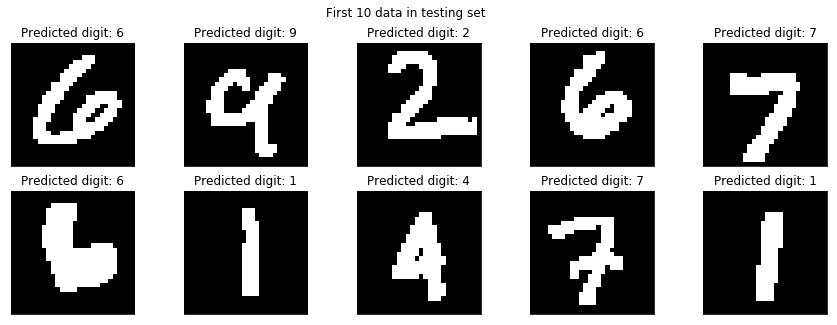

In [59]:
fig = plt.figure(figsize = (15,5))
_ = fig.suptitle('First 10 data in testing set')
for i in range(1,11):
    plt.subplot(2,5,i)
    showImg(squareFormat(svm_test_sampe[i-1]), Prediction[i-1])